## 过拟合和欠拟合
* 过拟合：模型能很好地拟合训练样本，但是对新数据的预测准确性很差
* 欠拟合：模型不能很好地拟合训练样本，且对新数据的预测也不好

In [6]:
from imports import *

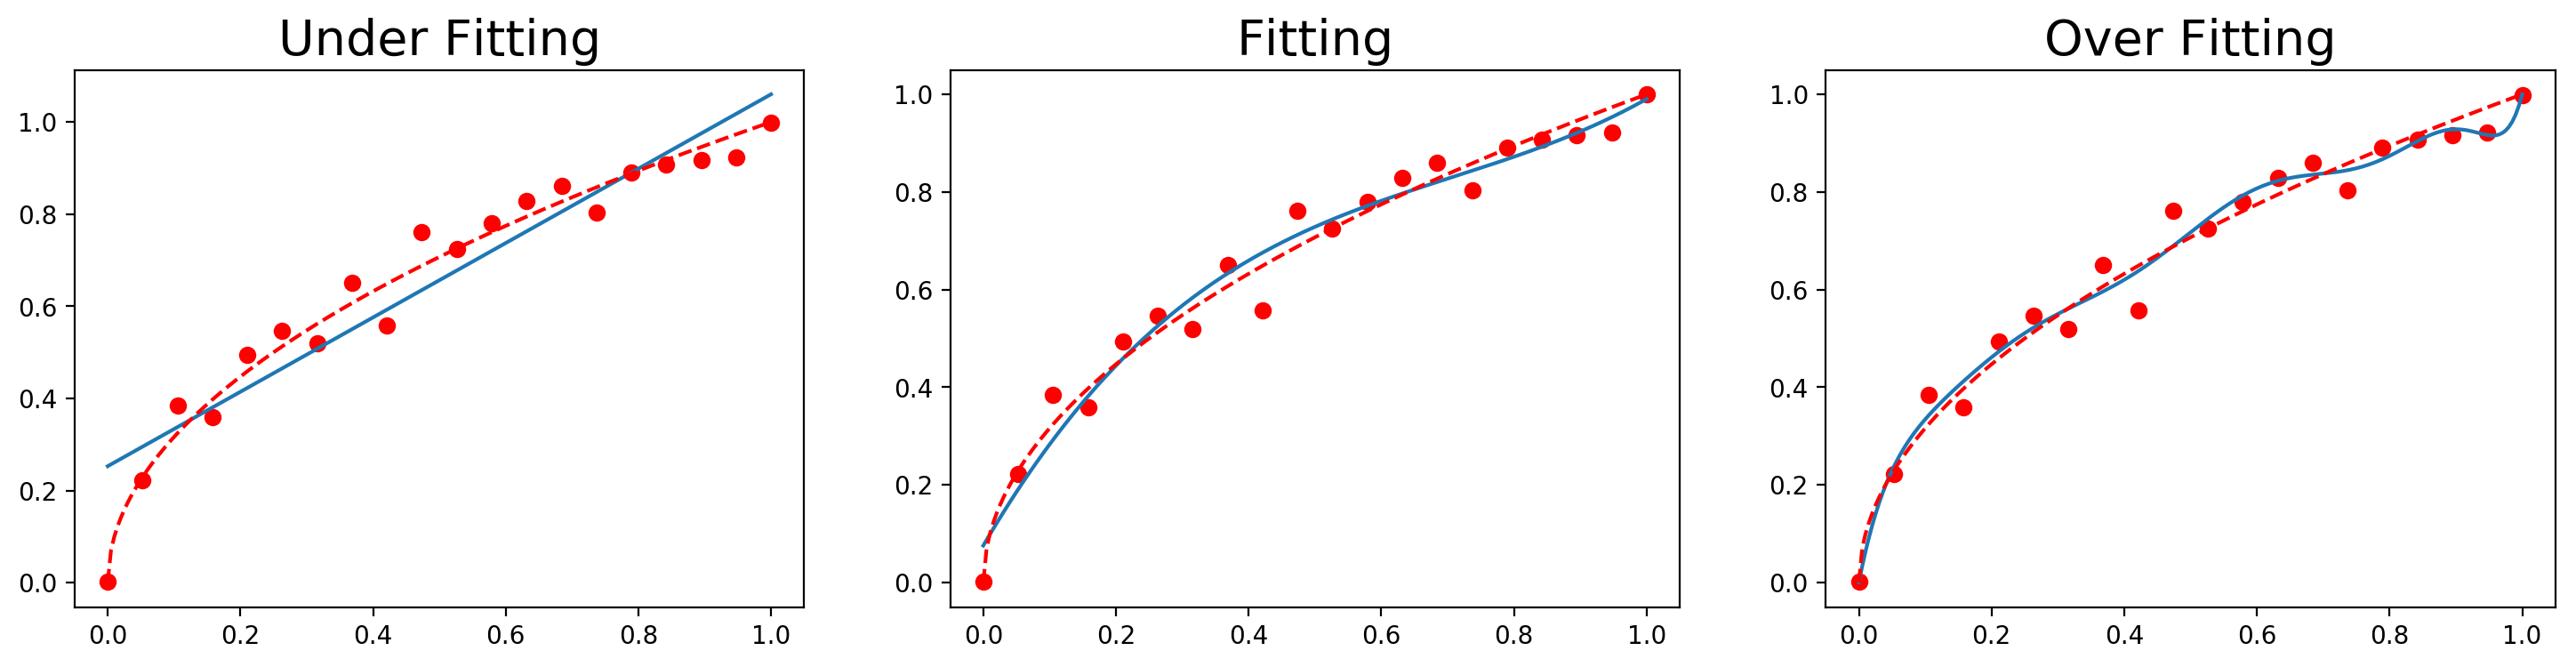

In [7]:
n_dots = 20

x = np.linspace(0, 1, n_dots)                   # [0, 1] 之间创建 20 个点
y = np.sqrt(x) + 0.2*np.random.rand(n_dots) - 0.1;

def plot_polynomial_fit(x, y, order):
    p = np.poly1d(np.polyfit(x, y, order))

    # 画出拟合出来的多项式所表达的曲线以及原始的点
    t = np.linspace(0, 1, 200)
    plt.plot(x, y, 'ro', t, p(t), '-', t, np.sqrt(t), 'r--')
    return p

plt.figure(figsize=(18, 4), dpi=200)
titles = ['Under Fitting', 'Fitting', 'Over Fitting']
models = [None, None, None]
for index, order in enumerate([1, 3, 10]): # 分别对应：一阶多项式，三阶多项式，十阶多项式
    plt.subplot(1, 3, index + 1)
    models[index] = plot_polynomial_fit(x, y, order)
    plt.title(titles[index], fontsize=20)

## 成本函数
#### 成本是衡量模型与训练样本符合程度的指标，就是训练值与真实值的误差平均值
#### 成本函数就是成本与模型参数的函数关系
$$J(θ)=J(θ_0,θ_1)=\frac1{2m}{\sum_{i=1}^m}{(h(x^{(i)}-y^{(i)})^2} $$
m是训练样本个数，$ h(x^{(i)})$ 是模型对每个样本的预测值，$y^{(i)}$ 是每个样本的真实值

## 模型准确性


# 决策树
### 算法原理
> 首先选取一个信息增益最大的类别进行分类
减少熵：减少不确定性

* 熵增原理：孤立热力学系统的熵不减少，总是增大或者不变。即不会变得有序

决策树的创建过程：  
从训练数据集中归纳出一组分类规则，使它与训练数据矛盾较小的同时具有较强的泛化能力。
1. 计算数据集划分前的信息熵
2. 遍历素有未作为划分条件的特征，分别计算根据每个特征划分数据集后的信息熵
3. 选择信息增益最大的特征，并使用这个特征作为数据划分节点来划分数据
4. 递归地处理被划分后的子数据集，从未被选择的特征里继续选择最优数据划分特征来划分子数据集
5. 终止条件：所有特征都用完了；划分后的信息增益足够小了
#### 使用这种信息增益作为特征选择的算法，叫做ID3算法

基尼不纯度：$Gini(D)=\sum{P(x)}{(1-P(x))}$ ,P(x)是样本属于这个类别的概率  
#### 使用基尼不纯度作为特征选择标准，叫做CART算法

### 剪枝算法（解决过拟合问题）
* 前剪枝
构造决策树的同时进行剪枝。也就是设置一个阈值，信息熵减小的数量小于这个阈值，就停止。还有一些简单的，比如说限制叶子节点的样本个数
* 后剪枝
指构造完成之后进行剪枝。  
对拥有同样父节点的一组节点进行检查，判断如果将其合并，信息熵的增加量是否小于某一阈值，如果小于阈值，则可以合并  
删除一些子树，使用其根节点代替，然后新叶子节点的类别使用这个叶子节点里样本最多的类别作为这个新叶子节点的类别  
是目前较普遍的做法  
#### 降低错误率剪枝法
找一个子树，用子树的根节点代替这颗子树作为新的叶子节点，类别通过大多数原则来确定。然后使用交叉验证数据集来测试这个决策树，看看其错误率是不是降低了，如果降低了，就可以使用这个简化版的决策树代替原来的。

## 算法参数
* criterion：特征选择标准。gini 和entropy
* splitter：创建决策树分支的选项，一种是选择最优的分支创建原则，另外一种是从排名靠前的特征中，随机选择一个
* max_depth：指定最大深度，解决过拟合问题
* min_samples_split：能够创建分支的数据集大小。默认是2
* min_samples_leaf: 前剪枝里面的方法，指创建分支后的节点样本数量必须大于等于这个数值
* max_leaf_nodes：限制最大的样本节点个数
* min_impurity_decrease信息增益比如大于这个阈值，否则不创建分支

#### C4.5（ID3的改进版本）
* 增加了对连续值得处理，可以把数据离散化
* 自动处理特征值缺失问题（直接抛弃）
* 使用信息增益比作为特征选择标准
* 采用后剪枝算法处理过拟合
#### C5.0（C4.5的改进）
运算效率更高，使用内存更小等

## 集合算法（Ensemble）
利用统计学采样原理，训练出成百上千个不同的算法模型，当需要预测一个新样本时，使用这些模型分别对这个样本进行预测，然后采用少数服从多数原则，决定新样本的类别
### 自助聚合算法Bagging（Bootstrap Aggregating）
采用有放回的采用规则，从m个样本的原数据集里进行n次采样，构成一个包含n个样本的新训练数据集，然后拿这个新训练数据集来训练模型。重复上次过程B次，得到B个模型，当有新样本需要进行预测时，拿这B个模型分别对这个样本进行预测，然后采用投票方式（分类问题）或求平均值方式（回归问题）得到新样本的预测值。
### 正向激励算法boosting
初始化时，针对有m个训练样本的数据集，给每个样本都分配一个初始权重，然后使用这个带权重的数据集来训练模型。针对预测错误的样本，增加其权重值，然后拿这个新的带权重的数据集来训练一个新模型。
#### boosting算法的实现，最著名的是AdaBoost。
### 随机森林
每次训练时，不拿所有的特征来训练，而是随机选择一个特征的子集来进行训练。  
算法原理：  
1. 单颗决策树的构建
* 采用有放回的采样，从原数据集中经过m次采样，获取到一个有m个样本的数据集（可能有重复的）
* 从n个特征里，采用无放回采样规则，从中取出f个特征作为输入特征
* 在新数据集上（即m个样本，f个特征的数据集上），构建决策树
* 重复上述过程t次，构建出t颗决策树
2. 随机森林的分类结果
生成t棵树之后，对于每个新的测试样例，总和多颗树的预测结果来作为结果。如果是数字类型，则取平均值，如果是分类，则少数服从多数。
#### 为什么要选取特征的子集来构建决策树
假如某个输入特征对预测结果是强关联的，那么如果选择全部的特征来构建，这个特征都会在所有的决策树里体现，那么由于这个特征和预测结果强关联，那么会造成所有的决策树都强烈地反映这个特征的“倾向”性，从而导致无法很好地解决过拟合问题
### ExtraTrees算法
随机选择一个特征来分裂（而不是信息熵啥的）

In [76]:
from imports import *
path = '../scikit-learn-source/datasets/titanic/train.csv'

def read_dataset(fname):
    data = pd.read_csv(fname)
    data.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)
    data['Sex'] = (data['Sex']== 'male').astype('int')
    labels = data['Embarked'].unique().tolist()
    data['Embarked'] = data['Embarked'].apply(lambda n: labels.index(n))
    data = data.fillna(0)
    return data
train = read_dataset(path)
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
dtype: object

In [10]:
y = train['Survived'].values
X = train.drop(['Survived'],axis=1).values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
train_score = clf.score(X_train,y_train)
test_score = clf.score(X_test,y_test)
print('train score:{0};test score :{1}'.format(train_score,test_score))

train score:0.981741573034;test score :0.798882681564


best param:14;best score:0.837988826816


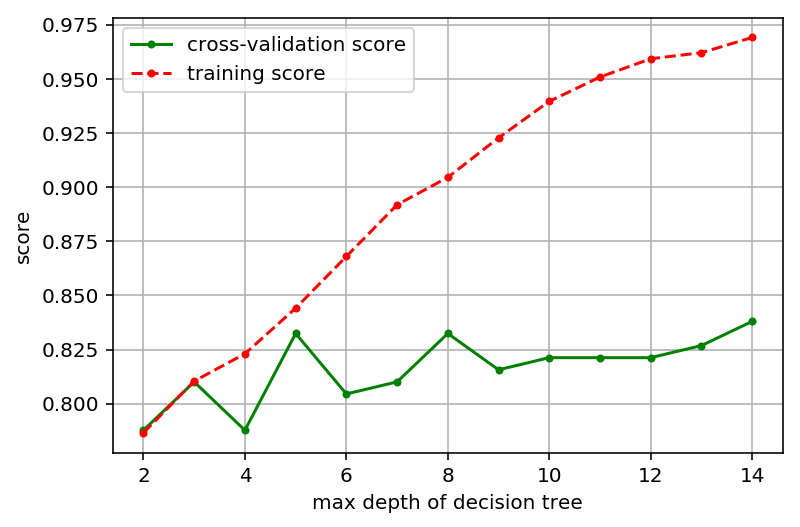

In [22]:
# sklearn 不提供后剪枝，但是可以调整参数

# 参数选择 max_depth
def cv_score(d):
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(X_train,y_train)
    tr_score = clf.score(X_train,y_train)
    cv_score = clf.score(X_test,y_test)
    return (tr_score,cv_score)
depths = range(2,15)
scores = [cv_score(d) for d in depths]
tr_scores = [s[0] for s in scores]
cv_scores = [s[1] for s in scores]

best_score_index = np.argmax(cv_scores)
best_score = cv_scores[best_score_index]
best_param = depths[best_score_index]
print('best param:{0};best score:{1}'.format(best_param,best_score))
plt.figure(figsize=(6,4),dpi=144)
plt.grid()
plt.xlabel('max depth of decision tree')
plt.ylabel('score')
plt.plot(depths,cv_scores,'.g-',label='cross-validation score')
plt.plot(depths,tr_scores,'.r--',label='training score')
plt.legend()

best params:0.00190909090909;best score:0.860335195531


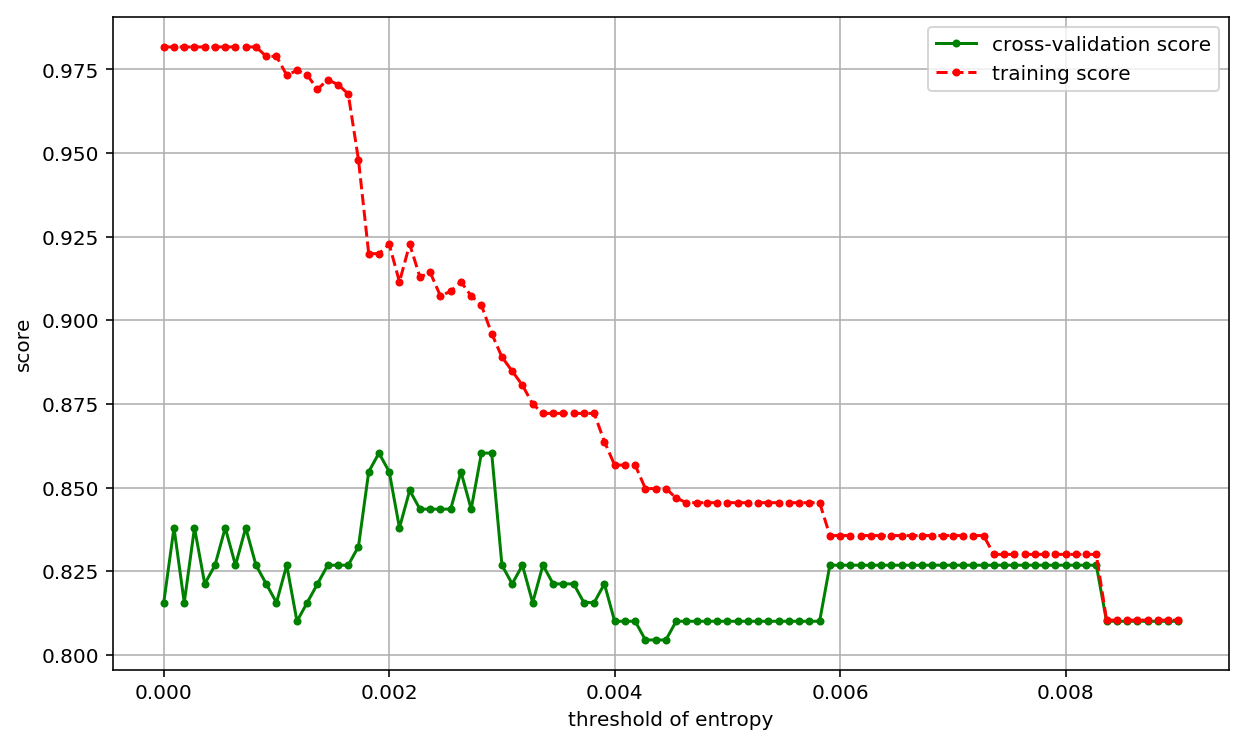

In [38]:
def cv_score(val):
    clf = DecisionTreeClassifier(criterion='entropy',min_impurity_decrease=val)
    clf.fit(X_train,y_train)
    tr_score = clf.score(X_train,y_train)
    cv_score = clf.score(X_test,y_test)
    return (tr_score,cv_score)

values = np.linspace(0,0.009,100)
scores = [cv_score(v) for v in values]
tr_scores = [s[0] for s in scores]
cv_scores = [s[1] for s in scores]

best_score_index = np.argmax(cv_scores)
best_score = cv_scores[best_score_index]
best_param = values[best_score_index]
print('best params:{0};best score:{1}'.format(best_param,best_score))

plt.figure(figsize=(10,6),dpi=144)
plt.grid()
plt.xlabel('threshold of entropy')
plt.ylabel('score')
plt.plot(values,cv_scores,'.g-',label='cross-validation score')
plt.plot(values,tr_scores,'.r--',label='training score')
plt.legend()


In [43]:
def plot_curve(train_sizes, cv_results, xlabel):
    train_scores_mean = cv_results['mean_train_score']
    train_scores_std = cv_results['std_train_score']
    test_scores_mean = cv_results['mean_test_score']
    test_scores_std = cv_results['std_test_score']
    plt.figure(figsize=(10, 6), dpi=144)
    plt.title('parameters turning')
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel('score')
    plt.fill_between(train_sizes, 
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, 
                     alpha=0.1, color="r")
    plt.fill_between(train_sizes, 
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, 
                     alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, '.--', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, '.-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")

### 模型参数选择工具包

best params:{'min_impurity_decrease': 0.0010909090909090907}
best score:0.812570145903


c:\python27\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\python27\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


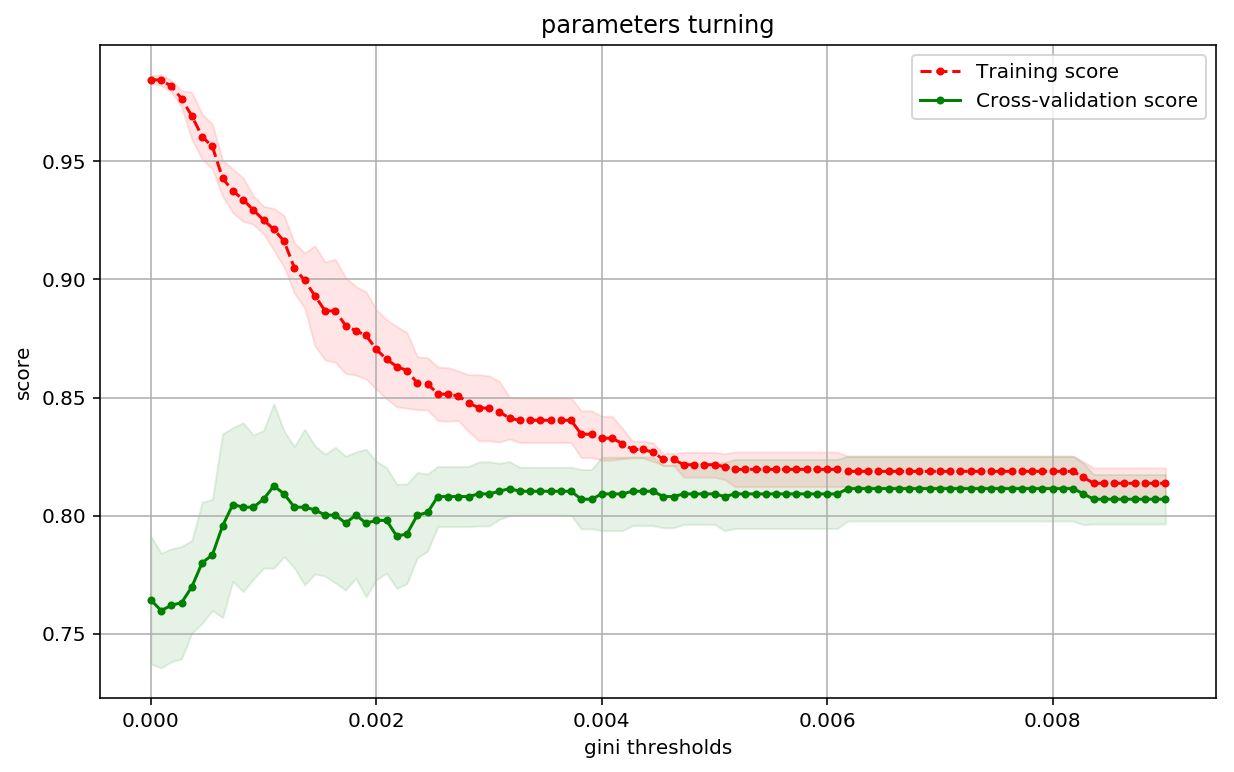

In [45]:
from sklearn.model_selection import GridSearchCV

thresholds = np.linspace(0,0.009,100)
param_grid = {"min_impurity_decrease":thresholds}

clf = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)
clf.fit(X,y)
print("best params:{0}\nbest score:{1}".format(clf.best_params_,clf.best_score_))
plot_curve(thresholds,clf.cv_results_,xlabel='gini thresholds')

In [47]:
# 对多个参数调优
entropy_thresholds = np.linspace(0,0.009,100)
gini_thresholds = np.linspace(0,0.009,100)

param_grid = [{'criterion':['entropy'],
              'min_impurity_decrease':entropy_thresholds},
             {'criterion':['gini'],
             'min_impurity_decrease':gini_thresholds},
             {'max_depth':range(2,10)},
             {'min_samples_split':range(2,30,2)}]
clf = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)
clf.fit(X,y)
print("best param:{0}\nbest scores:{1}".format(clf.best_params_,clf.best_score_))

best param:{'min_impurity_decrease': 0.0029090909090909089, 'criterion': 'entropy'}
best scores:0.826038159371


In [49]:
clf = DecisionTreeClassifier(criterion='entropy', min_impurity_split=0.53061224489795911)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))

from sklearn.tree import export_graphviz
# 导出 titanic.dot 文件
with open("titanic.dot", 'w') as f:
    f = export_graphviz(clf, out_file=f)

# 1. 在电脑上安装 graphviz
# 2. 运行 `dot -Tpng titanic.dot -o titanic.png` 
# 3. 在当前目录查看生成的决策树 titanic.png

train score: 0.935393258427; test score: 0.843575418994


c:\python27\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


In [80]:
test_path = '../scikit-learn-source/datasets/titanic/test.csv'
test_data = read_dataset(test_path)

X = test_data.drop(['PassengerId'],axis=1).values
y = clf.predict(X)
#test_data.head(10)
#test_data['PassengerId']
test_csv = pd.DataFrame({"PassengerId":test_data['PassengerId'],"Survived":y})
test_csv.head(10)
test_csv.to_csv('./gender_submission.csv')

# 支持向量机（SVM）

SVM的最大特点是能构造出最大间距的决策边界，从而提高分类算法的鲁棒性
### 大间距分类算法
* 分隔超平面：用来分隔的分割线
* 间距：点到分割线上的距离的两倍
* 支持向量：离分隔超平面最近的点
### 松弛系数
目的：纠正过拟合，对噪声数据有更强的适应性。
### 核函数
特征向量的内积
* 线性函数 $K(x^{(i)},x^{(j)}) = x^{(i)T}x^{(j)}$
* 多项式核函数 $K(x^{(i)},x^{(j)}) = {(γx^{(i)T}x^{(j)}+c)}^n$
* 高斯核函数 ：可以把特征映射到无限多维，但是没有多项式核函数计算那么困难
### 相似性函数
特征映射函数，把低纬映射到高维

#### 逻辑回归和SVM的选择：
假设：n是特征个数，m是样本个数  
* 如果n>>m，使用逻辑回归或线性函数的svm算法都可以
* n比较小，m中等大小，可以使用高斯核函数的svm
* n比较小，m比较大，那么一般需要增加特征，需要使用多项式核函数或者高斯核函数
#### 数据量大，复杂一点的模型；数据量小，简单一点的模型

### sklearn中的SVM
* svc：分类
* svr：回归
参数：
* kernel：核函数
    * linear：线性函数
    * poly：多项式
    * rbf：高斯
* 不同的核函数需要指定不同的参数
    * 线性：
        * C：表示对不符合最大间距规则的样本的惩罚力度
    * 多项式：
        * C：
        * degree：多项式的阶数
    * 高斯：
        * C
        * gamma

In [87]:
# 画出样本点，同时画出分类区间。
# 原理：使用numpy.meshgrid()生成一个坐标矩阵，然后预测坐标矩阵中每个点所属的类别
# 最后用contourf()函数，为坐标矩阵中不同类别的点填充不同的颜色
def plot_hyperplane(clf, X, y, 
                    h=0.02, 
                    draw_sv=True, 
                    title='hyperplan'):
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    plt.title(title)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='hot', alpha=0.5)

    markers = ['o', 's', '^']
    colors = ['b', 'r', 'c']
    labels = np.unique(y)
    for label in labels:
        plt.scatter(X[y==label][:, 0], 
                    X[y==label][:, 1], 
                    c=colors[label], 
                    marker=markers[label])
    if draw_sv:
        sv = clf.support_vectors_
        plt.scatter(sv[:, 0], sv[:, 1], c='y', marker='x')

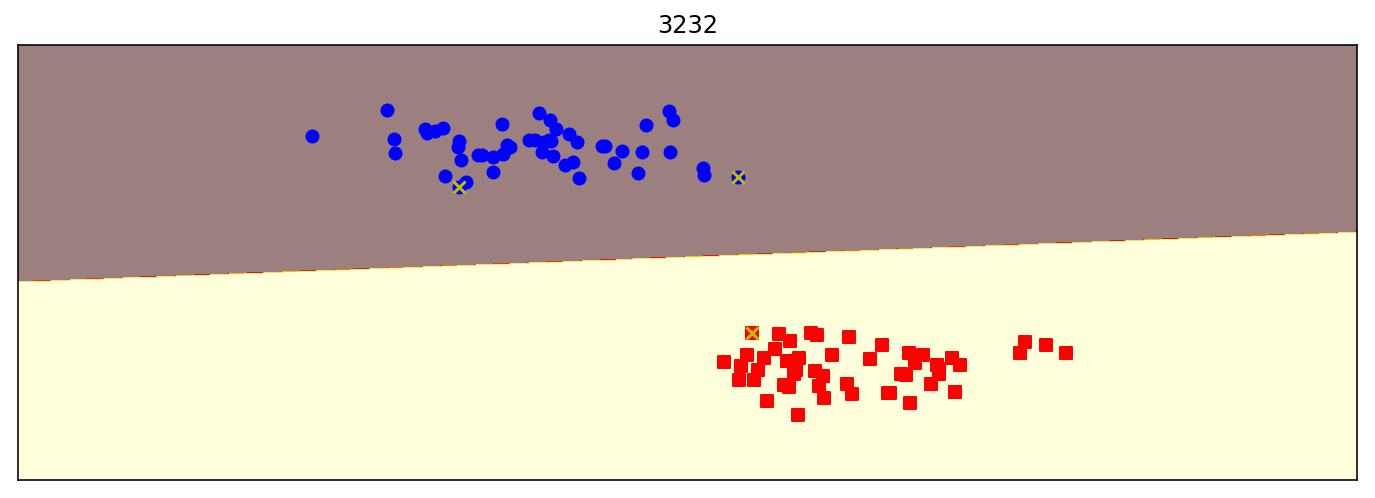

In [88]:
from sklearn import svm
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples=100,centers=2,random_state=0,cluster_std=0.3)

clf = svm.SVC(C=1.0,kernel='linear')
clf.fit(X,y)
plt.figure(figsize=(12,4),dpi=144)
plot_hyperplane(clf,X,y,h=0.01,title="3232")

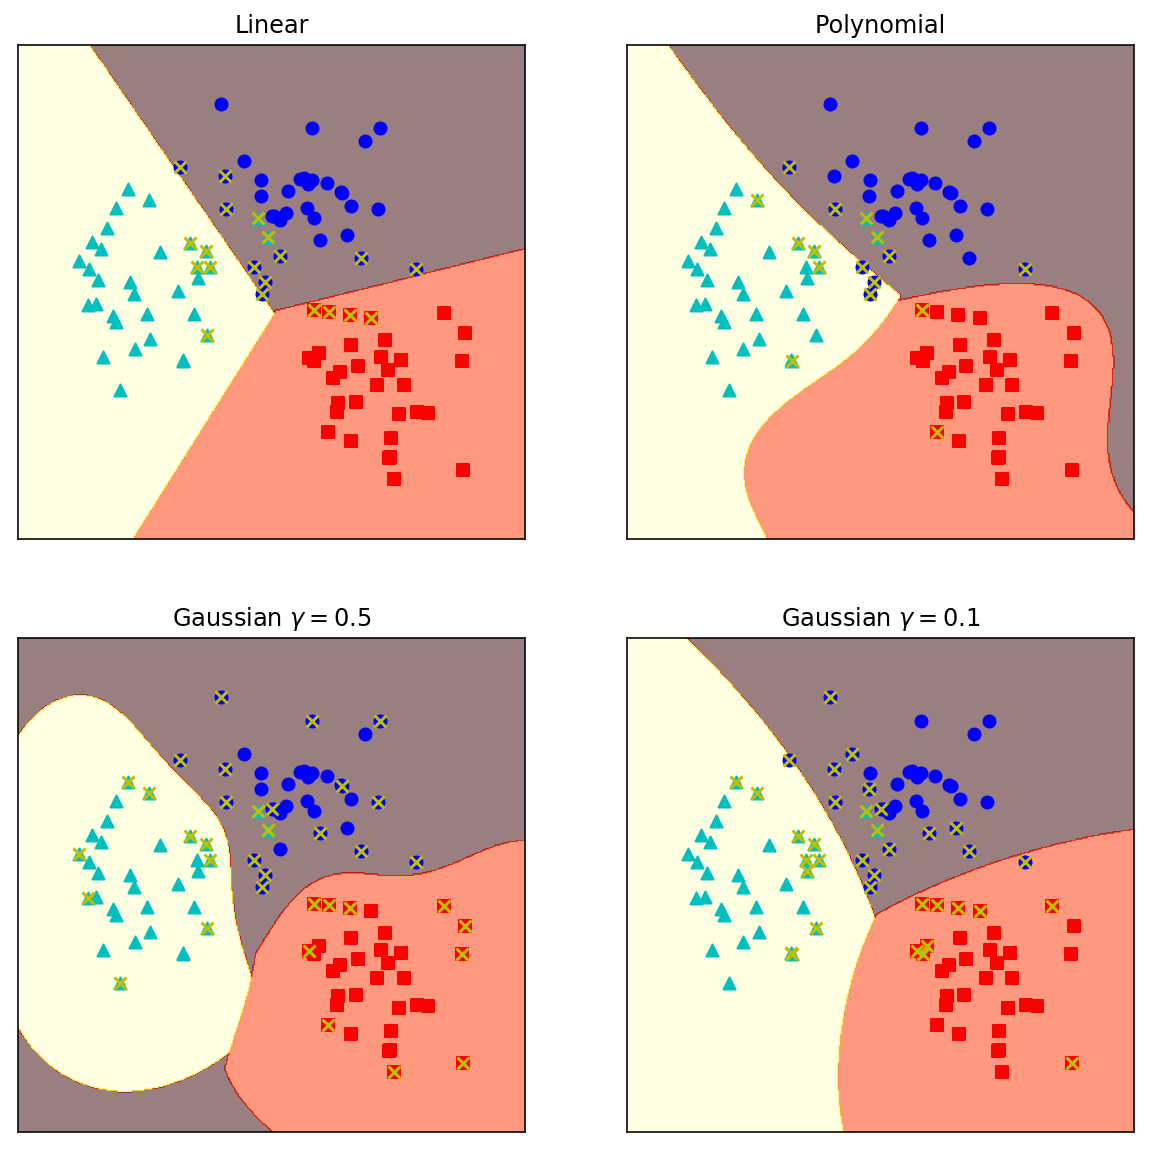

In [89]:
X,y = make_blobs(n_samples=100,centers=3,random_state=0,cluster_std=0.8)
clf_linear = svm.SVC(C=1.0,kernel='linear')
clf_poly = svm.SVC(C=1.0,kernel='poly',degree=3)
clf_rbf = svm.SVC(C=1.0,kernel='rbf',gamma=0.5)
clf_rbf2 = svm.SVC(C=1.0,kernel='rbf',gamma=0.1)

plt.figure(figsize=(10,10),dpi=144)
clfs = [clf_linear,
clf_poly,
clf_rbf,
clf_rbf2]
titles = ['Linear','Polynomial','Gaussian $\gamma=0.5$','Gaussian $\gamma=0.1$']

for clf,i in zip(clfs,range(len(clfs))):
    clf.fit(X,y)
    plt.subplot(2,2,i+1)
    plot_hyperplane(clf,X,y,title=titles[i])

In [100]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
print('data shape:{0};no.positive:{1};no.negative:{2}'.format(X.shape,y[y==1].shape[0],y[y==0].shape[0]))
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

data shape:(569, 30);no.positive:357;no.negative:212


In [104]:
from sklearn.svm import SVC

clf = SVC(C=1.0, kernel='rbf', gamma=0.1)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))

train score: 1.0; test score: 0.578947368421


best param:{'gamma': 0.00011379310344827585}
 best score:0.936731107206


<module 'matplotlib.pyplot' from 'c:\python27\lib\site-packages\matplotlib\pyplot.pyc'>

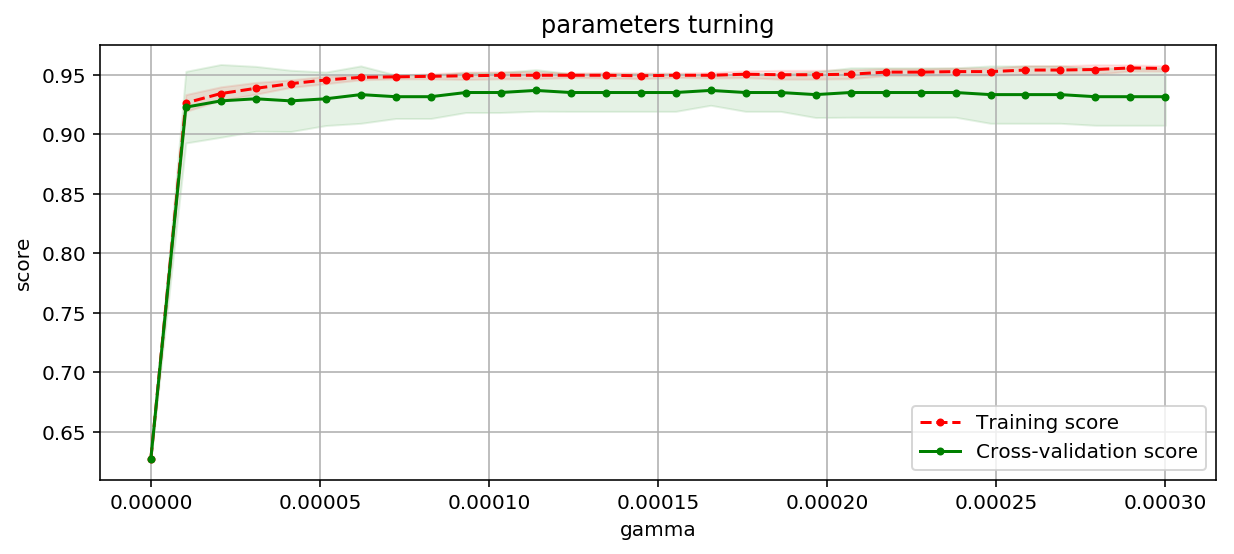

In [105]:
# 利用GridSearchCV来自动选择参数
from sklearn.model_selection import GridSearchCV

gammas = np.linspace(0,0.0003,30)
param_grid = {'gamma':gammas}
clf = GridSearchCV(SVC(),param_grid,cv=5)
clf.fit(X,y)
print("best param:{0}\n best score:{1}".format(clf.best_params_,clf.best_score_))
plt.figure(figsize=(10,4),dpi=144)
plot_param_curve(plt,gammas,clf.cv_results_,xlabel='gamma')

In [102]:
def plot_learning_curve(plt, estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o--', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

elaspe: 1.028190


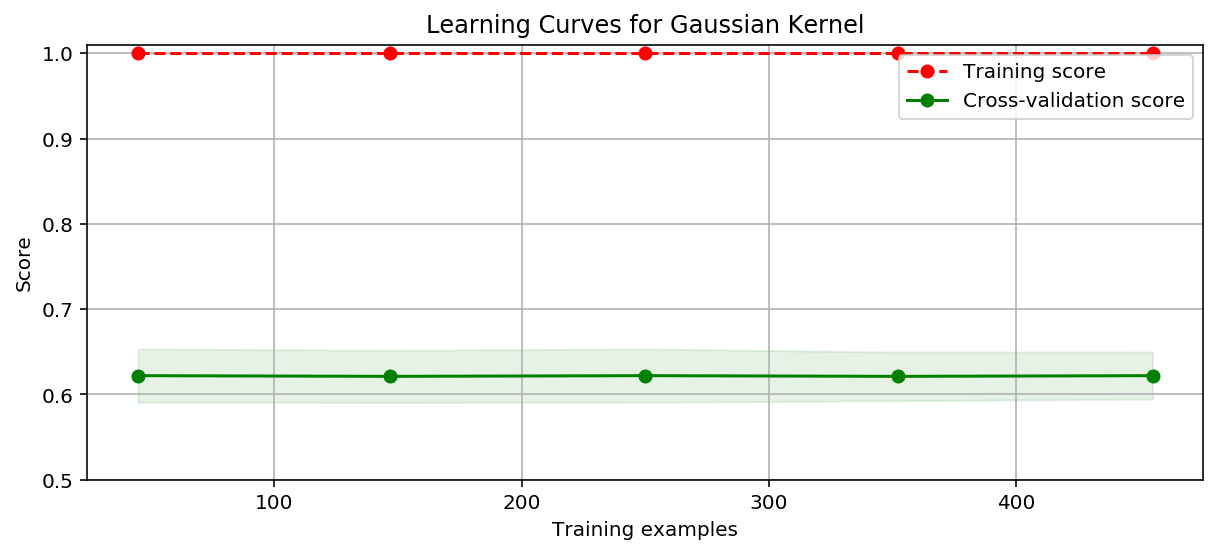

In [110]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
title = 'Learning Curves for Gaussian Kernel'

start = time.clock()
plt.figure(figsize=(10, 4), dpi=144)
plot_learning_curve(plt, SVC(C=1.0, kernel='rbf', gamma=0.01),
                    title, X, y, ylim=(0.5, 1.01), cv=cv)

print('elaspe: {0:.6f}'.format(time.clock()-start))

In [111]:
clf = SVC(C=1.0,kernel='poly',degree=2)
clf.fit(X_train,y_train)
train_score = clf.score(X_train,y_train)
test_score = clf.score(X_test,y_test)

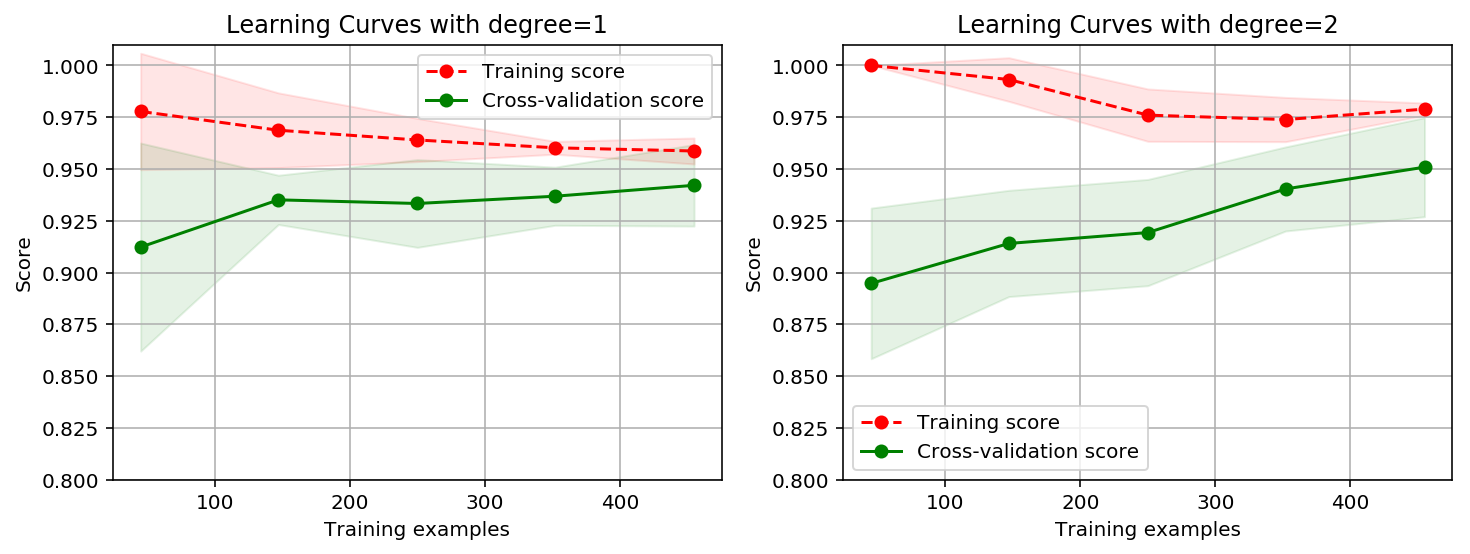

In [112]:
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
title = 'Learning Curves with degree={0}'
degrees = [1,2]

start = time.clock()
plt.figure(figsize=(12,4),dpi=144)
for i in range(len(degrees)):
    plt.subplot(1,len(degrees),i+1)
    plot_learning_curve(plt,SVC(C=1.0,kernel='poly',degree=degrees[i]),
                       title.format(degrees[i]),
                       X,y,ylim=(0.8,1.01),cv=cv,n_jobs=4)

# 朴素贝叶斯算法（Naive Bayers）
在条件独立假设的基础上，使用贝叶斯定理构造算法，在文本处理领域有广泛的应用
#### 原理：
> 当观察样本时x时，其所属的类别y=Ck的概率，即$p(C_k|x)$，然后取最大的那个即时x所属的类别。  
由于是“朴素”，即我们假设时间之间没有关联关系。

不同的概率分布对应不同的算法：
* GaussianNB：高斯分布的朴素贝叶斯算法
* MultinomialNB：多项式分布的朴素贝叶斯算法
* BernoulliNB：伯努利分布的朴素贝叶斯算法

In [113]:
train_path = '../scikit-learn-source/datasets/mlcomp/379/train/'
test_path = '../scikit-learn-source/datasets/mlcomp/379/test/'

from sklearn.datasets import load_files
# load_files()会把这个目录里所有的文档都读入内存，并且自动根据所在的子目录名称打上标签
# 其中，news_train.data是一个数组，里面包含了所有文档的文本信息
# news_train.target也是一个数组，包含了所有文档所属的类别
# news_train.target_names是类别的名称
news_train = load_files(train_path)
print("summary:{0} documents in {1} categories.".format(
len(news_train.data),len(news_train.target_names)))

summary:13180 documents in 20 categories.


In [114]:
# 将文档全部转换为由TF-IDF表达的权重信息构成的向量
from sklearn.feature_extraction.text import TfidfVectorizer
# TfidfVectorizer类是用来把所有的文档转换为矩阵，该矩阵每行都代表一个文档，一行中的每个元素代表一个对应的词语的重要性
vectorizer = TfidfVectorizer(encoding='latin-1')
X_train = vectorizer.fit_transform((d for d in news_train.data))
X_train.shape
# 行表示样本，列表示特征

(13180, 130274)

In [115]:
from sklearn.naive_bayes import MultinomialNB

y_train = news_train.target
clf = MultinomialNB(alpha=0.0001) #平滑参数，值越小，越容易造成过拟合
clf.fit(X_train,y_train)
train_score = clf.score(X_train,y_train)
train_score

0.99787556904400609

In [122]:
news_test = load_files(test_path)
X_test = vectorizer.transform((d for d in news_test.data))
y_test = news_test.target
pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,pred,target_names=news_test.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.90      0.91      0.91       245
           comp.graphics       0.80      0.90      0.85       298
 comp.os.ms-windows.misc       0.82      0.79      0.80       292
comp.sys.ibm.pc.hardware       0.81      0.80      0.81       301
   comp.sys.mac.hardware       0.90      0.91      0.91       256
          comp.windows.x       0.88      0.88      0.88       297
            misc.forsale       0.87      0.81      0.84       290
               rec.autos       0.92      0.93      0.92       324
         rec.motorcycles       0.96      0.96      0.96       294
      rec.sport.baseball       0.97      0.94      0.96       315
        rec.sport.hockey       0.96      0.99      0.98       302
               sci.crypt       0.95      0.96      0.95       297
         sci.electronics       0.91      0.85      0.88       313
                 sci.med       0.96      0.96      0.96       277
         

In [123]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred)
print(cm)

[[224   0   0   0   0   0   0   0   0   0   0   0   0   0   2   5   0   0
    1  13]
 [  1 267   5   5   2   8   1   1   0   0   0   2   3   2   1   0   0   0
    0   0]
 [  1  13 230  24   4  10   5   0   0   0   0   1   2   1   0   0   0   0
    1   0]
 [  0   9  21 242   7   2  10   1   0   0   1   1   7   0   0   0   0   0
    0   0]
 [  0   1   5   5 233   2   2   2   1   0   0   3   1   0   1   0   0   0
    0   0]
 [  0  20   6   3   1 260   0   0   0   2   0   1   0   0   2   0   2   0
    0   0]
 [  0   2   5  12   3   1 235  10   2   3   1   0   7   0   2   0   2   1
    4   0]
 [  0   1   0   0   1   0   8 300   4   1   0   0   1   2   3   0   2   0
    1   0]
 [  0   1   0   0   0   2   2   3 283   0   0   0   1   0   0   0   0   0
    1   1]
 [  0   1   1   0   1   2   1   2   0 297   8   1   0   1   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   2   2 298   0   0   0   0   0   0   0
    0   0]
 [  0   1   2   0   0   1   1   0   0   0   0 284   2   1   0   0

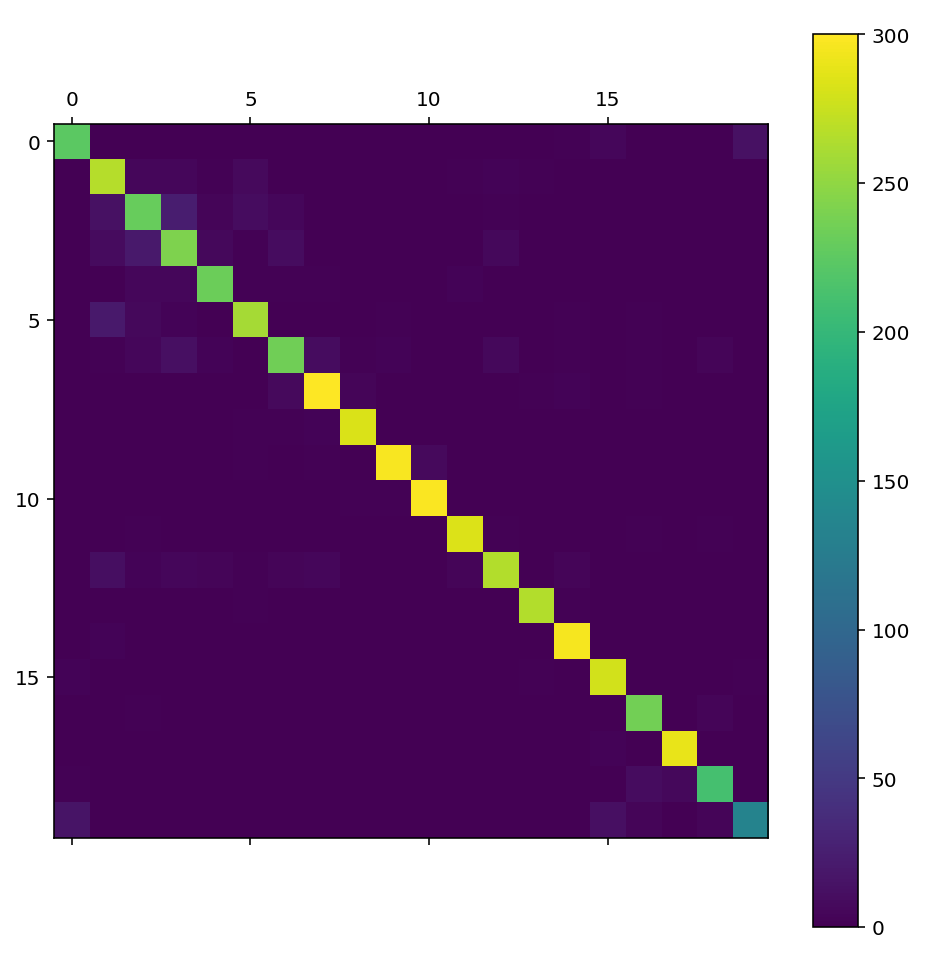

In [126]:
plt.figure(figsize=(8,8),dpi=144)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.matshow(cm,fignum=1)
plt.colorbar()

<module 'matplotlib.pyplot' from 'c:\python27\lib\site-packages\matplotlib\pyplot.pyc'>

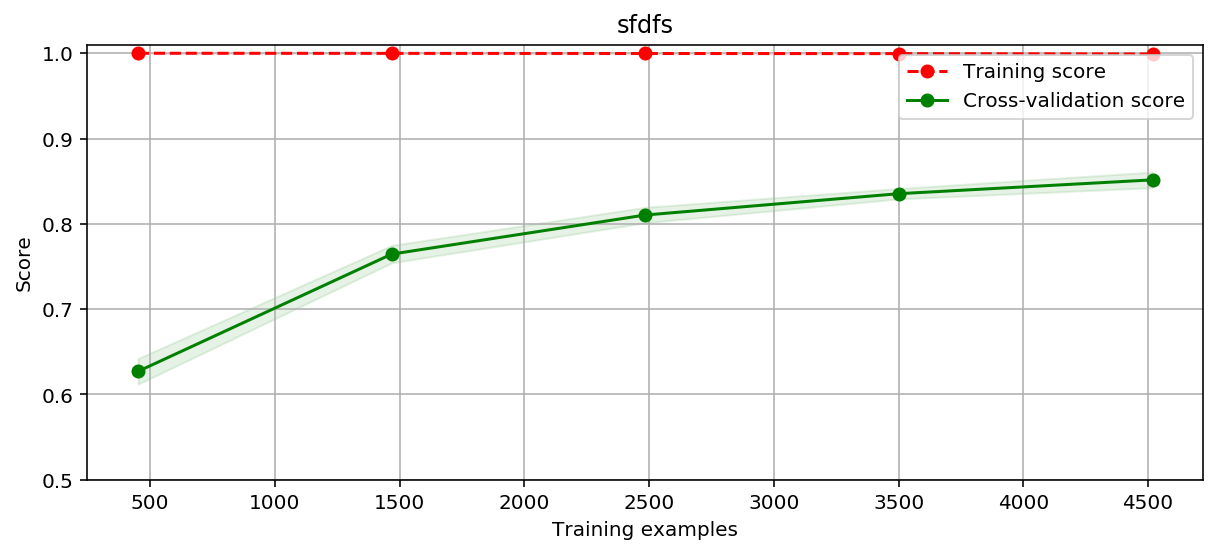

In [127]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
title ='sfdfs'
plt.figure(figsize=(10, 4), dpi=144)
plot_learning_curve(plt,MultinomialNB(alpha=0.0001) ,
                    title, X_test, y_test, ylim=(0.5, 1.01), cv=cv)

best param:{'alpha': 0.0066842105263157899}
 best score:0.910773899848


<module 'matplotlib.pyplot' from 'c:\python27\lib\site-packages\matplotlib\pyplot.pyc'>

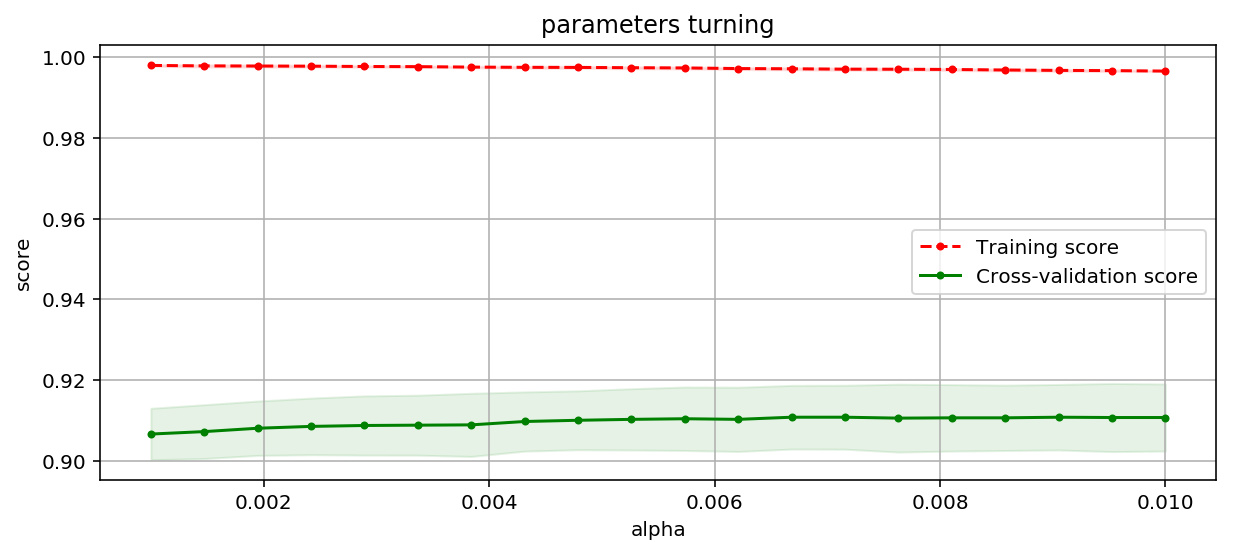

In [133]:
alpha = np.linspace(0.001,0.01,20)
param_grid = {'alpha':alpha}
clf = GridSearchCV(MultinomialNB(),param_grid,cv=5)
clf.fit(X_train,y_train)
print("best param:{0}\n best score:{1}".format(clf.best_params_,clf.best_score_))
plt.figure(figsize=(10,4),dpi=144)
plot_param_curve(plt,alpha,clf.cv_results_,xlabel='alpha')


# 主成分分析法（PCA)
#### 算法原理
> 让二维数据上的点投射到一个直线上，让平均距离最小

#### 步骤：
1. 数据归一化再缩放$$x_j^{(i)}=\frac{a_j^{(i)}-μ_j}{s_j}$$
2. 计算协方差矩阵的特征向量
3. 数据降维和恢复

### PCA 数据还原
#### 数据还原率
即压缩后的数据能在多大程度上还原出原数据。
#### 加快监督机器学习算法的运算速度
PCA的一个典型应用是用来加快监督学习的速度

In [134]:
# 用Numpy模拟PCA计算
A = np.array([[3,2000],
             [2,3000],
             [4,5000],
             [1,2000]],dtype='float')
# 数据归一化
mean = np.mean(A,axis=0)
norm = A - mean
# 数据缩放
scope = np.max(norm,axis=0) - np.min(norm,axis=0)
norm = norm/scope
norm

array([[ 0.16666667, -0.33333333],
       [-0.16666667,  0.        ],
       [ 0.5       ,  0.66666667],
       [-0.5       , -0.33333333]])

In [138]:
U,S,V = np.linalg.svd(np.dot(norm.T,norm))
# 由于需要把二维降维，因此只取第一列来构造Ureduce
U_reduce = U[:,0].reshape(2,1)
# 有了主成分特征矩阵，就可以对数据进行降维了
R = np.dot(norm,U_reduce)
R

array([[ 0.1395923 ],
       [ 0.11030043],
       [-0.83068673],
       [ 0.58079401]])

In [140]:
# 如果需要还原的话
Z = np.dot(R,U_reduce.T)
np.multiply(Z,scope) + mean

array([[  2.22285238e+00,   2.68605210e+03],
       [  2.28100868e+00,   2.75193053e+03],
       [  4.14925183e+00,   4.86824314e+03],
       [  1.34688711e+00,   1.69377423e+03]])

In [141]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

def std_PCA(**argv):
    scaler = MinMaxScaler()
    pca = PCA(**argv)
    pipeline = Pipeline([('scaler',scaler),
                        ('pca',pca)])
    return pipeline

pca = std_PCA(n_components=1)
R2 = pca.fit_transform(A)
R2

array([[-0.1395923 ],
       [-0.11030043],
       [ 0.83068673],
       [-0.58079401]])

In [142]:
pca.inverse_transform(R2)

array([[  2.22285238e+00,   2.68605210e+03],
       [  2.28100868e+00,   2.75193053e+03],
       [  4.14925183e+00,   4.86824314e+03],
       [  1.34688711e+00,   1.69377423e+03]])

In [144]:
# 人脸识别
import logging
from sklearn.datasets import fetch_olivetti_faces

logging.basicConfig(level=logging.INFO,format='%(asctime)s%(message)s')
data_home = '../scikit-learn-source/datasets/'
logging.info('Start to load dataset')
faces =  fetch_olivetti_faces(data_home=data_home)
logging.info('Done')

2018-07-18 18:23:11,446Start to load dataset
2018-07-18 18:23:11,802Done


In [145]:
X = faces.data
y = faces.target
targets = np.unique(faces.target)
target_names = np.array(["c%d"% t for t in targets])
n_targets = target_names.shape[0]
n_samples,h,w = faces.images.shape
print('Sample count:{}\n Target count:{}'.format(n_samples,n_targets))
print('Image size:{}x{}\n Dataset shape:{}\n'.format(w,h,X.shape))

Sample count:400
 Target count:40
Image size:64x64
 Dataset shape:(400, 4096)



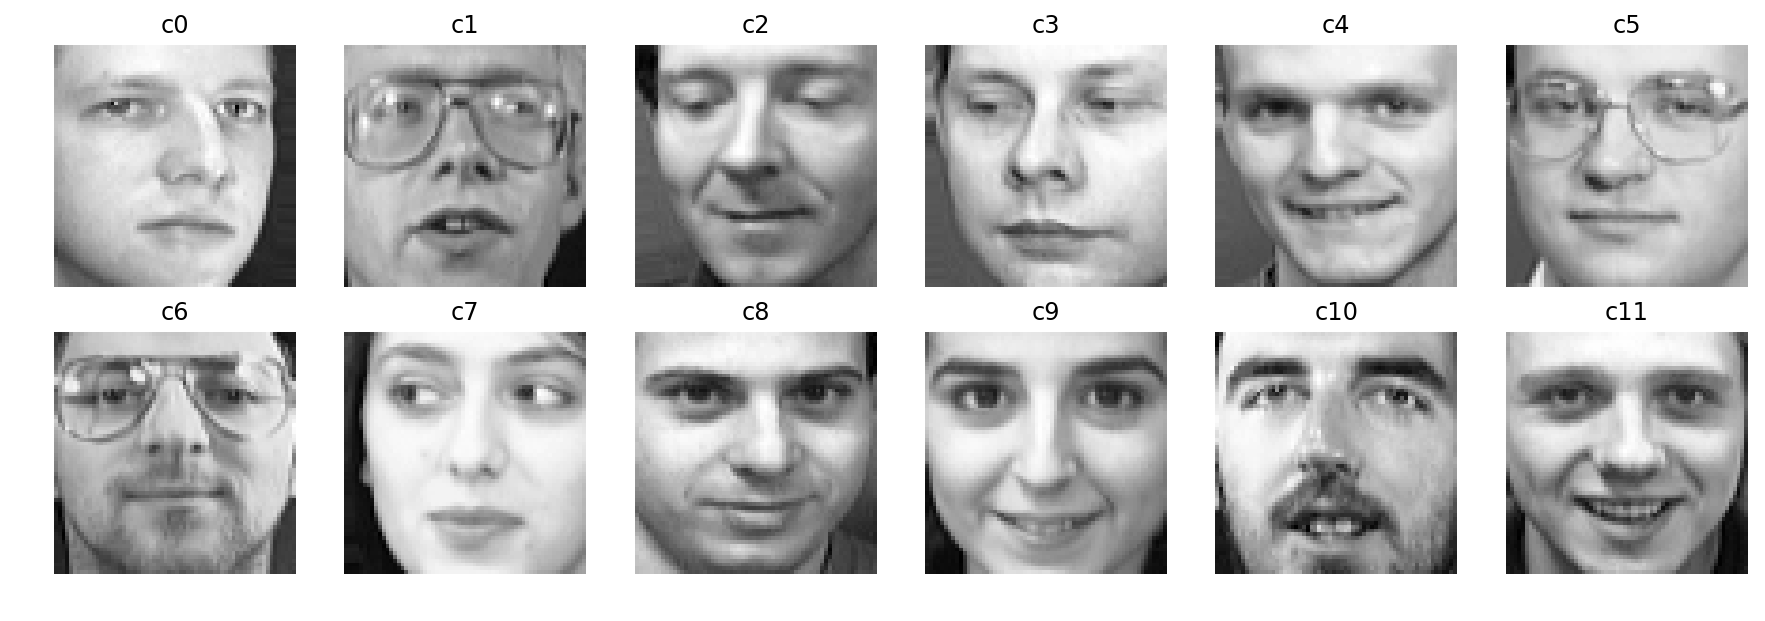

In [150]:
def plot_gallery(images,titles,h,w,n_row=2,n_col=5):
    plt.figure(figsize=(2*n_col,2.2*n_row),dpi=144)
    plt.subplots_adjust(bottom=0,left=.01,right=.99,top=.90,hspace=.01)
    for i in range(n_row*n_col):
        plt.subplot(n_row,n_col,i+1)
        plt.imshow(images[i].reshape((h,w)),cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.axis('off')
n_row = 2
n_col = 6

sample_images = None
sample_titles = []
for i in range(n_targets):
    people_images = X[y==i]
    people_sample_index = np.random.randint(0,people_images.shape[0],1)
    people_sample_image = people_images[people_sample_index,:]
    if sample_images is not None:
        sample_images = np.concatenate((sample_images,people_sample_image),axis=0)
    else:
        sample_images = people_sample_image
    sample_titles.append(target_names[i])
    
plot_gallery(sample_images,sample_titles,h,w,n_row,n_col)

# k-均值算法
k-均值算法是一种典型的无监督机器学习算法，用来解决聚类问题（Clustering）
### 算法原理
* 分类：给出已经标记了的数据，对新的数据进行分类
* 聚类：只给出一组无标记的数据，目标是找出这组数据的模式特征。
应用：  
* 市场细分
* 社交网络人群划分
步骤：  
1. 给聚类中心分配点。计算所有的训练样例，把每个训练样例分配到距离其最近的聚类中心所在的类别里
2. 移动聚类中心。新的聚类中心移动到这个聚类素有的点的平均值处  
3. 重复上面的步骤，知道聚类中心不再移动为止  
数学描述：  
1. 随机选择k个聚类中心u1,u2,...,uk
2. 从1~m中遍历所有的数据集，计算$x^{(i)}$分别到u1，u2，...，uk的距离，记录距离最短的聚类中心点uj，然后把$x^{(i)}$这个点分配给这个聚类。即令$c^{(i)}=j$
3. 从1~k中遍历所有的聚类中心，移动聚类中心的新位置到这个聚类的均值处。
4. 重复步骤2，直到聚类中心不再移动

### 成本函数
定义：模型预测值与实际值的误差
$$J = \frac1m{\sum^{m}_{i=1}{||x^i-u_{c^i}||^2}}$$
### 随机初始化聚类中心点
多做几次随机初始化的动作，然后训练出不同的聚类中心点及聚类节点分配方案，然后用这些值算出成本函数，从中选择成本最小的那个
### 选择聚类的个数
和业务有关，或者看成本函数在聚类个数的拐点在哪

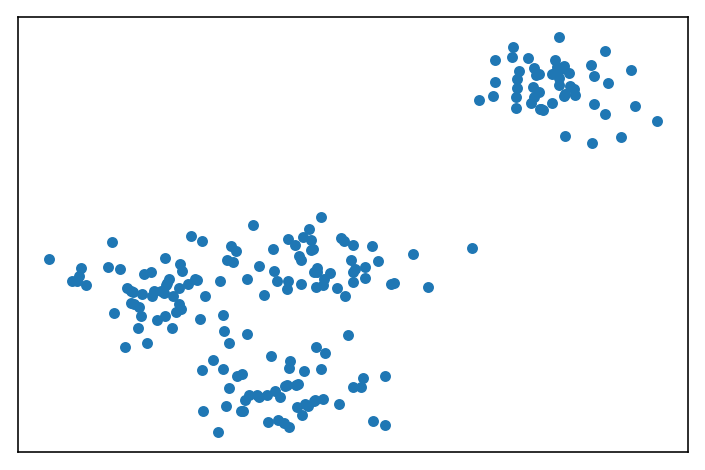

In [151]:
# 生成样本
X,y = make_blobs(n_samples=200,
                n_features=2,
                centers=4,
                cluster_std=1,
                center_box=(-10.0,10.0),
                shuffle=True,
                random_state=1);
plt.figure(figsize=(6,4),dpi=144)
plt.xticks(())
plt.yticks(())
plt.scatter(X[:,0],X[:,1],s=20,marker='o');`

In [156]:
from sklearn.cluster import KMeans
n_clusters = 3
kmean = KMeans(n_clusters=n_clusters)
kmean.fit(X);
print("kmean:k={},cost={}".format(n_clusters,int(kmean.score(X))))

kmean:k=3,cost=-668


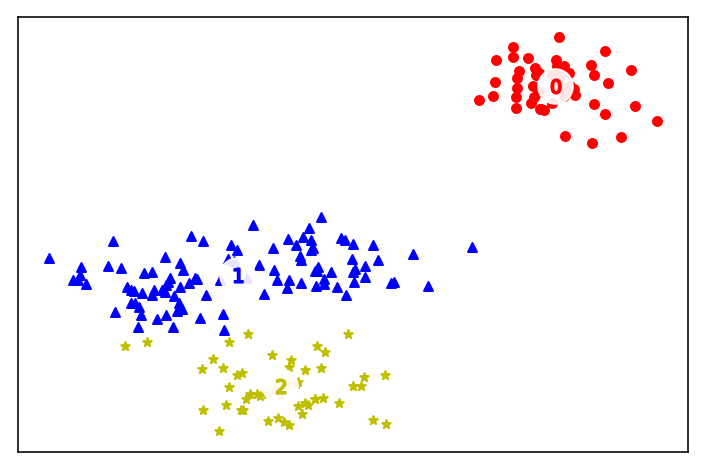

In [157]:
labels = kmean.labels_
centers = kmean.cluster_centers_
markers = ['o','^','*']
colors = ['r','b','y']

plt.figure(figsize=(6,4),dpi=144)
plt.xticks(())
plt.yticks(())

for c in range(n_clusters):
    cluster = X[labels == c]
    plt.scatter(cluster[:,0],cluster[:,1],
               marker=markers[c],s=20,c=colors[c])
plt.scatter(centers[:,0],centers[:,1],
           marker='o',c="white",alpha=0.9,s=300)
for i,c in enumerate(centers):
    plt.scatter(c[0],c[1],marker='$%d$'%i,s=50,c=colors[i])